In [1]:
import pandas as pd
import numpy as np
import datetime
from sim import generate_simulation
from model_cancellations import get_otb_res, predict_cancellations

pd.options.display.max_rows = 150
pd.options.display.max_columns = 250

In [2]:
DATE_FMT = "%Y-%m-%d"
h1_capacity = 187
h2_capacity = 226
AOD = "2017-08-01"
AOD_dt = pd.to_datetime(AOD)

h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")
# h1_sim = pd.read_pickle("pickle/h1_sim.pick")
# h2_sim = pd.read_pickle("pickle/h2_sim.pick")

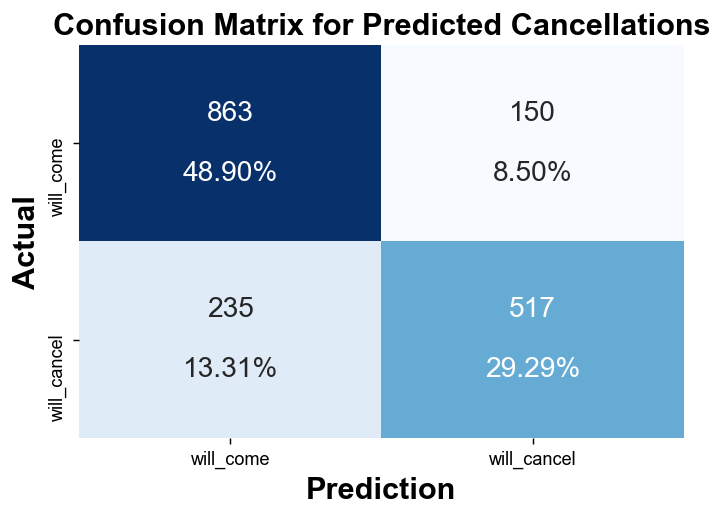

Optimal probability threshold (to maximize F-0.5): 0.67
F-0.5 Score: 0.756

Setting up simulation...
Estimating prices...
Pulling T-Minus OTB statistics...
Pulling STLY OTB statistics...
Training 31 models to obtain STLY statistics...

Pulling stats from STLY date 2016-08-02, stay_date 2016-08-02...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-03...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-04...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-05...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-06...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-07...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-08...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-09...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-10...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-11...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-12...
Pulling stats from STLY date 2016-08-02, stay_dat

In [3]:
h1_sim = generate_simulation(h1_dbd, AOD, 1, h1_res)

In [4]:
h1_sim.shape

(31, 258)

In [5]:
h1_sim.head(15)

,DOW,RoomsOTB,RevOTB,CxlForecast,TRN_RoomsOTB,TRN_RevOTB,TRN_CxlForecast,TRNP_RoomsOTB,TRNP_RevOTB,TRNP_CxlForecast,GRP_RoomsOTB,GRP_RevOTB,GRP_CxlForecast,CNT_RoomsOTB,CNT_RevOTB,CNT_CxlForecast,Date,TM05_Date,TM15_Date,TM30_Date,WeekEndDate,WE,WD,STLY_Date,Occ,RevPAR,RemSupply,ADR_OTB,TRN_ADR_OTB,TRNP_ADR_OTB,GRP_ADR_OTB,CNT_ADR_OTB,LYA_Occ,LYA_RoomsSold,LYA_ADR,LYA_RoomRev,LYA_RevPAR,LYA_NumCancels,LYA_TRN_RoomsSold,LYA_TRN_ADR,LYA_TRN_RoomRev,LYA_GRP_RoomsSold,LYA_GRP_ADR,LYA_GRP_RoomRev,LYA_TRNP_RoomsSold,LYA_TRNP_ADR,LYA_TRNP_RoomRev,LYA_CNT_RoomsSold,LYA_CNT_ADR,LYA_CNT_RoomRev,RoomsGapToLYA,ADR_GapToLYA,Actual_RoomsSold,Actual_ADR,Actual_RoomRev,Actual_TRN_RoomsSold,Actual_TRN_ADR,Actual_TRN_RoomRev,Realized_Cxls,SellingPrice,TM30_RoomsOTB,TM30_ADR_OTB,TM30_RevOTB,TM30_TRN_RoomsOTB,TM30_TRN_ADR_OTB,TM30_TRN_RevOTB,TM30_TRNP_RoomsOTB,TM30_TRNP_ADR_OTB,TM30_TRNP_RevOTB,TM30_GRP_RoomsOTB,TM30_GRP_ADR_OTB,TM30_GRP_RevOTB,TM30_CNT_RoomsOTB,TM30_CNT_ADR_OTB,TM30_CNT_RevOTB,TM15_RoomsOTB,TM15_ADR_OTB,TM15_RevOTB,TM15_TRN_RoomsOTB,TM15_TRN_ADR_OTB,TM15_TRN_RevOTB,TM15_TRNP_RoomsOTB,TM15_TRNP_ADR_OTB,TM15_TRNP_RevOTB,TM15_GRP_RoomsOTB,TM15_GRP_ADR_OTB,TM15_GRP_RevOTB,TM15_CNT_RoomsOTB,TM15_CNT_ADR_OTB,TM15_CNT_RevOTB,TM05_RoomsOTB,TM05_ADR_OTB,TM05_RevOTB,TM05_TRN_RoomsOTB,TM05_TRN_ADR_OTB,TM05_TRN_RevOTB,TM05_TRNP_RoomsOTB,TM05_TRNP_ADR_OTB,TM05_TRNP_RevOTB,TM05_GRP_RoomsOTB,TM05_GRP_ADR_OTB,TM05_GRP_RevOTB,TM05_CNT_RoomsOTB,TM05_CNT_ADR_OTB,TM05_CNT_RevOTB,TM30_RoomsPickup,TM30_ADR_Pickup,TM30_RevPickup,TM30_TRN_RoomsPickup,TM30_TRN_ADR_Pickup,TM30_TRN_RevPickup,TM30_TRNP_RoomsPickup,TM30_TRNP_ADR_Pickup,TM30_TRNP_RevPickup,TM30_GRP_RoomsPickup,TM30_GRP_ADR_Pickup,TM30_GRP_RevPickup,TM30_CNT_RoomsPickup,TM30_CNT_ADR_Pickup,TM30_CNT_RevPickup,TM15_RoomsPickup,TM15_ADR_Pickup,TM15_RevPickup,TM15_TRN_RoomsPickup,TM15_TRN_ADR_Pickup,...,TM15_CNT_ADR_Pickup,TM15_CNT_RevPickup,TM05_RoomsPickup,TM05_ADR_Pickup,TM05_RevPickup,TM05_TRN_RoomsPickup,TM05_TRN_ADR_Pickup,TM05_TRN_RevPickup,TM05_TRNP_RoomsPickup,TM05_TRNP_ADR_Pickup,TM05_TRNP_RevPickup,TM05_GRP_RoomsPickup,TM05_GRP_ADR_Pickup,TM05_GRP_RevPickup,TM05_CNT_RoomsPickup,TM05_CNT_ADR_Pickup,TM05_CNT_RevPickup,STLY_RoomsOTB,STLY_ADR_OTB,STLY_RevOTB,STLY_SellingPrice,STLY_TM05_RoomsOTB,STLY_TM15_ADR_OTB,STLY_TM05_RevOTB,STLY_TM15_RoomsOTB,STLY_TM05_ADR_OTB,STLY_TM15_RevOTB,STLY_TM30_RoomsOTB,STLY_TM30_ADR_OTB,STLY_TM30_RevOTB,STLY_TRN_RoomsOTB,STLY_TRN_ADR_OTB,STLY_TRN_RevOTB,STLY_TM05_TRN_RoomsOTB,STLY_TM05_TRN_ADR_OTB,STLY_TM05_TRN_RevOTB,STLY_TM15_TRN_RoomsOTB,STLY_TM15_TRN_ADR_OTB,STLY_TM15_TRN_RevOTB,STLY_TM30_TRN_RoomsOTB,STLY_TM30_TRN_ADR_OTB,STLY_TM30_TRN_RevOTB,STLY_TRNP_RoomsOTB,STLY_TRNP_ADR_OTB,STLY_TRNP_RevOTB,STLY_TM05_TRNP_RoomsOTB,STLY_TM05_TRNP_ADR_OTB,STLY_TM05_TRNP_RevOTB,STLY_TM15_TRNP_RoomsOTB,STLY_TM15_TRNP_ADR_OTB,STLY_TM15_TRNP_RevOTB,STLY_TM30_TRNP_RoomsOTB,STLY_TM30_TRNP_ADR_OTB,STLY_TM30_TRNP_RevOTB,STLY_GRP_RoomsOTB,STLY_GRP_ADR_OTB,STLY_GRP_RevOTB,STLY_TM05_GRP_RoomsOTB,STLY_TM05_GRP_ADR_OTB,STLY_TM05_GRP_RevOTB,STLY_TM15_GRP_RoomsOTB,STLY_TM15_GRP_ADR_OTB,STLY_TM15_GRP_RevOTB,STLY_TM30_GRP_RoomsOTB,STLY_TM30_GRP_ADR_OTB,STLY_TM30_GRP_RevOTB,STLY_CNT_RoomsOTB,STLY_CNT_ADR_OTB,STLY_CNT_RevOTB,STLY_TM05_CNT_RoomsOTB,STLY_TM05_CNT_ADR_OTB,STLY_TM05_CNT_RevOTB,STLY_TM15_CNT_RoomsOTB,STLY_TM15_CNT_ADR_OTB,STLY_TM15_CNT_RevOTB,STLY_TM30_CNT_RoomsOTB,STLY_TM30_CNT_ADR_OTB,STLY_TM30_CNT_RevOTB,STLY_TM30_RoomsPickup,STLY_TM30_ADR_Pickup,STLY_TM30_RevPickup,STLY_TM15_RoomsPickup,STLY_TM15_ADR_Pickup,STLY_TM15_RevPickup,STLY_TM05_RoomsPickup,STLY_TM05_ADR_Pickup,STLY_TM05_RevPickup,STLY_TM30_TRN_RoomsPickup,STLY_TM30_TRN_ADR_Pickup,STLY_TM30_TRN_RevPickup,STLY_TM15_TRN_RoomsPickup,STLY_TM15_TRN_ADR_Pickup,STLY_TM15_TRN_RevPickup,STLY_TM05_TRN_RoomsPickup,STLY_TM05_TRN_ADR_Pickup,STLY_TM05_TRN_RevPickup,STLY_RoomRev,STLY_TRN_RoomRev,STLY_TRNP_RoomRev,STLY_GRP_RoomRev,STLY_CNT_RoomRev,RoomsOTB_Pace,ADR_OTB_Pace,RevOTB_Pace,TRN_RoomsOTB_Pace,TRN_ADR_OTB_Pace,TRN_Rev

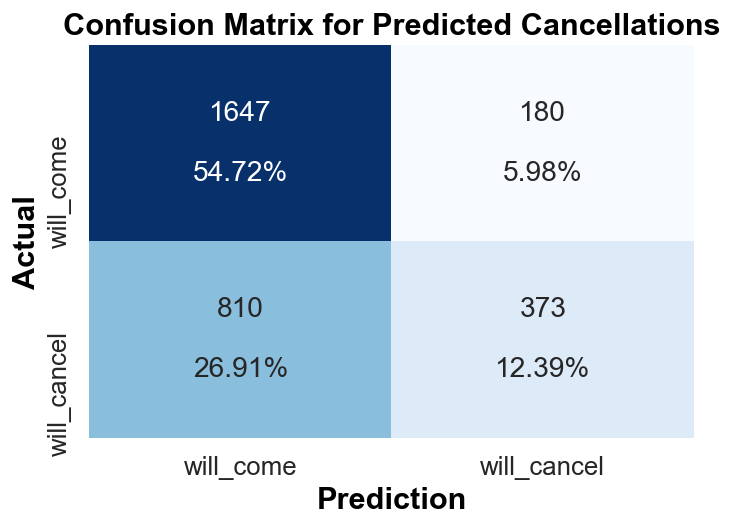

Optimal probability threshold (to maximize F-0.5): 0.35
F-0.5 Score: 0.549

Setting up simulation...
Estimating prices...
Pulling T-Minus OTB statistics...
Pulling STLY OTB statistics...
Training 31 models to obtain STLY statistics...

Pulling stats from STLY date 2016-08-02, stay_date 2016-08-02...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-03...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-04...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-05...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-06...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-07...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-08...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-09...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-10...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-11...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-12...
Pulling stats from STLY date 2016-08-02, stay_dat

In [6]:
h2_sim = generate_simulation(h2_dbd, AOD, 2, h2_res)

In [7]:
h2_sim.head()

,DOW,RoomsOTB,RevOTB,CxlForecast,TRN_RoomsOTB,TRN_RevOTB,TRN_CxlForecast,TRNP_RoomsOTB,TRNP_RevOTB,TRNP_CxlForecast,GRP_RoomsOTB,GRP_RevOTB,GRP_CxlForecast,CNT_RoomsOTB,CNT_RevOTB,CNT_CxlForecast,Date,TM05_Date,TM15_Date,TM30_Date,WeekEndDate,WE,WD,STLY_Date,Occ,RevPAR,RemSupply,ADR_OTB,TRN_ADR_OTB,TRNP_ADR_OTB,GRP_ADR_OTB,CNT_ADR_OTB,LYA_Occ,LYA_RoomsSold,LYA_ADR,LYA_RoomRev,LYA_RevPAR,LYA_NumCancels,LYA_TRN_RoomsSold,LYA_TRN_ADR,LYA_TRN_RoomRev,LYA_GRP_RoomsSold,LYA_GRP_ADR,LYA_GRP_RoomRev,LYA_TRNP_RoomsSold,LYA_TRNP_ADR,LYA_TRNP_RoomRev,LYA_CNT_RoomsSold,LYA_CNT_ADR,LYA_CNT_RoomRev,RoomsGapToLYA,ADR_GapToLYA,Actual_RoomsSold,Actual_ADR,Actual_RoomRev,Actual_TRN_RoomsSold,Actual_TRN_ADR,Actual_TRN_RoomRev,Realized_Cxls,SellingPrice,TM30_RoomsOTB,TM30_ADR_OTB,TM30_RevOTB,TM30_TRN_RoomsOTB,TM30_TRN_ADR_OTB,TM30_TRN_RevOTB,TM30_TRNP_RoomsOTB,TM30_TRNP_ADR_OTB,TM30_TRNP_RevOTB,TM30_GRP_RoomsOTB,TM30_GRP_ADR_OTB,TM30_GRP_RevOTB,TM30_CNT_RoomsOTB,TM30_CNT_ADR_OTB,TM30_CNT_RevOTB,TM15_RoomsOTB,TM15_ADR_OTB,TM15_RevOTB,TM15_TRN_RoomsOTB,TM15_TRN_ADR_OTB,TM15_TRN_RevOTB,TM15_TRNP_RoomsOTB,TM15_TRNP_ADR_OTB,TM15_TRNP_RevOTB,TM15_GRP_RoomsOTB,TM15_GRP_ADR_OTB,TM15_GRP_RevOTB,TM15_CNT_RoomsOTB,TM15_CNT_ADR_OTB,TM15_CNT_RevOTB,TM05_RoomsOTB,TM05_ADR_OTB,TM05_RevOTB,TM05_TRN_RoomsOTB,TM05_TRN_ADR_OTB,TM05_TRN_RevOTB,TM05_TRNP_RoomsOTB,TM05_TRNP_ADR_OTB,TM05_TRNP_RevOTB,TM05_GRP_RoomsOTB,TM05_GRP_ADR_OTB,TM05_GRP_RevOTB,TM05_CNT_RoomsOTB,TM05_CNT_ADR_OTB,TM05_CNT_RevOTB,TM30_RoomsPickup,TM30_ADR_Pickup,TM30_RevPickup,TM30_TRN_RoomsPickup,TM30_TRN_ADR_Pickup,TM30_TRN_RevPickup,TM30_TRNP_RoomsPickup,TM30_TRNP_ADR_Pickup,TM30_TRNP_RevPickup,TM30_GRP_RoomsPickup,TM30_GRP_ADR_Pickup,TM30_GRP_RevPickup,TM30_CNT_RoomsPickup,TM30_CNT_ADR_Pickup,TM30_CNT_RevPickup,TM15_RoomsPickup,TM15_ADR_Pickup,TM15_RevPickup,TM15_TRN_RoomsPickup,TM15_TRN_ADR_Pickup,...,TM15_CNT_ADR_Pickup,TM15_CNT_RevPickup,TM05_RoomsPickup,TM05_ADR_Pickup,TM05_RevPickup,TM05_TRN_RoomsPickup,TM05_TRN_ADR_Pickup,TM05_TRN_RevPickup,TM05_TRNP_RoomsPickup,TM05_TRNP_ADR_Pickup,TM05_TRNP_RevPickup,TM05_GRP_RoomsPickup,TM05_GRP_ADR_Pickup,TM05_GRP_RevPickup,TM05_CNT_RoomsPickup,TM05_CNT_ADR_Pickup,TM05_CNT_RevPickup,STLY_RoomsOTB,STLY_ADR_OTB,STLY_RevOTB,STLY_SellingPrice,STLY_TM05_RoomsOTB,STLY_TM15_ADR_OTB,STLY_TM05_RevOTB,STLY_TM15_RoomsOTB,STLY_TM05_ADR_OTB,STLY_TM15_RevOTB,STLY_TM30_RoomsOTB,STLY_TM30_ADR_OTB,STLY_TM30_RevOTB,STLY_TRN_RoomsOTB,STLY_TRN_ADR_OTB,STLY_TRN_RevOTB,STLY_TM05_TRN_RoomsOTB,STLY_TM05_TRN_ADR_OTB,STLY_TM05_TRN_RevOTB,STLY_TM15_TRN_RoomsOTB,STLY_TM15_TRN_ADR_OTB,STLY_TM15_TRN_RevOTB,STLY_TM30_TRN_RoomsOTB,STLY_TM30_TRN_ADR_OTB,STLY_TM30_TRN_RevOTB,STLY_TRNP_RoomsOTB,STLY_TRNP_ADR_OTB,STLY_TRNP_RevOTB,STLY_TM05_TRNP_RoomsOTB,STLY_TM05_TRNP_ADR_OTB,STLY_TM05_TRNP_RevOTB,STLY_TM15_TRNP_RoomsOTB,STLY_TM15_TRNP_ADR_OTB,STLY_TM15_TRNP_RevOTB,STLY_TM30_TRNP_RoomsOTB,STLY_TM30_TRNP_ADR_OTB,STLY_TM30_TRNP_RevOTB,STLY_GRP_RoomsOTB,STLY_GRP_ADR_OTB,STLY_GRP_RevOTB,STLY_TM05_GRP_RoomsOTB,STLY_TM05_GRP_ADR_OTB,STLY_TM05_GRP_RevOTB,STLY_TM15_GRP_RoomsOTB,STLY_TM15_GRP_ADR_OTB,STLY_TM15_GRP_RevOTB,STLY_TM30_GRP_RoomsOTB,STLY_TM30_GRP_ADR_OTB,STLY_TM30_GRP_RevOTB,STLY_CNT_RoomsOTB,STLY_CNT_ADR_OTB,STLY_CNT_RevOTB,STLY_TM05_CNT_RoomsOTB,STLY_TM05_CNT_ADR_OTB,STLY_TM05_CNT_RevOTB,STLY_TM15_CNT_RoomsOTB,STLY_TM15_CNT_ADR_OTB,STLY_TM15_CNT_RevOTB,STLY_TM30_CNT_RoomsOTB,STLY_TM30_CNT_ADR_OTB,STLY_TM30_CNT_RevOTB,STLY_TM30_RoomsPickup,STLY_TM30_ADR_Pickup,STLY_TM30_RevPickup,STLY_TM15_RoomsPickup,STLY_TM15_ADR_Pickup,STLY_TM15_RevPickup,STLY_TM05_RoomsPickup,STLY_TM05_ADR_Pickup,STLY_TM05_RevPickup,STLY_TM30_TRN_RoomsPickup,STLY_TM30_TRN_ADR_Pickup,STLY_TM30_TRN_RevPickup,STLY_TM15_TRN_RoomsPickup,STLY_TM15_TRN_ADR_Pickup,STLY_TM15_TRN_RevPickup,STLY_TM05_TRN_RoomsPickup,STLY_TM05_TRN_ADR_Pickup,STLY_TM05_TRN_RevPickup,STLY_RoomRev,STLY_TRN_RoomRev,STLY_TRNP_RoomRev,STLY_GRP_RoomRev,STLY_CNT_RoomRev,RoomsOTB_Pace,ADR_OTB_Pace,RevOTB_Pace,TRN_RoomsOTB_Pace,TRN_ADR_OTB_Pace,TRN_Rev

In [8]:
h1_sim.to_pickle("pickle/h1_sim.pick")
h2_sim.to_pickle("pickle/h2_sim.pick")

In [9]:
from model_cancellations import get_otb_res
import datetime
test = get_otb_res(h1_res,'2016-08-01')
mask = (test.ArrivalDate<='2016-08-05') & (test.CheckoutDate>'2016-08-05')
len(test[mask])

176

## Test LYA columns

In [10]:
lya_cols = [col for col in h1_sim.columns if col[:3] == 'LYA'] 
lya_cols

['LYA_Occ',
 'LYA_RoomsSold',
 'LYA_ADR',
 'LYA_RoomRev',
 'LYA_RevPAR',
 'LYA_NumCancels',
 'LYA_TRN_RoomsSold',
 'LYA_TRN_ADR',
 'LYA_TRN_RoomRev',
 'LYA_GRP_RoomsSold',
 'LYA_GRP_ADR',
 'LYA_GRP_RoomRev',
 'LYA_TRNP_RoomsSold',
 'LYA_TRNP_ADR',
 'LYA_TRNP_RoomRev',
 'LYA_CNT_RoomsSold',
 'LYA_CNT_ADR',
 'LYA_CNT_RoomRev']

In [11]:
h1_sim.loc['2017-08-05', ['STLY_Date'] + lya_cols]

STLY_Date             2016-08-06 00:00:00
LYA_Occ                              0.96
LYA_RoomsSold                       180.0
LYA_ADR                            190.06
LYA_RoomRev                      34211.53
LYA_RevPAR                         182.95
LYA_NumCancels                      106.0
LYA_TRN_RoomsSold                   148.0
LYA_TRN_ADR                        192.95
LYA_TRN_RoomRev                  28556.84
LYA_GRP_RoomsSold                     0.0
LYA_GRP_ADR                           0.0
LYA_GRP_RoomRev                       0.0
LYA_TRNP_RoomsSold                   23.0
LYA_TRNP_ADR                       201.26
LYA_TRNP_RoomRev                  4628.99
LYA_CNT_RoomsSold                     9.0
LYA_CNT_ADR                        113.97
LYA_CNT_RoomRev                    1025.7
Name: 2017-08-05 00:00:00, dtype: object

In [12]:
h1_dbd.loc['2016-08-06', [col[4:] for col in lya_cols]]

Occ                   0.96
RoomsSold            180.0
ADR                 190.06
RoomRev           34211.53
RevPAR              182.95
NumCancels           106.0
TRN_RoomsSold        148.0
TRN_ADR             192.95
TRN_RoomRev       28556.84
GRP_RoomsSold          0.0
GRP_ADR                0.0
GRP_RoomRev            0.0
TRNP_RoomsSold        23.0
TRNP_ADR            201.26
TRNP_RoomRev       4628.99
CNT_RoomsSold          9.0
CNT_ADR             113.97
CNT_RoomRev         1025.7
Name: 2016-08-06 00:00:00, dtype: object

In [13]:
stly_cols = [col for col in h1_sim.columns if col[:4] == 'STLY'] 

h1_sim.loc['2017-08-07', stly_cols]

STLY_Date                    2016-08-08 00:00:00
STLY_RoomsOTB                              183.0
STLY_ADR_OTB                              184.85
STLY_RevOTB                             33828.45
STLY_SellingPrice                         194.61
STLY_TM05_RoomsOTB                         180.0
STLY_TM15_ADR_OTB                          182.5
STLY_TM05_RevOTB                        33055.45
STLY_TM15_RoomsOTB                         178.0
STLY_TM05_ADR_OTB                         183.64
STLY_TM15_RevOTB                         32484.9
STLY_TM30_RoomsOTB                         177.0
STLY_TM30_ADR_OTB                         179.67
STLY_TM30_RevOTB                        31802.03
STLY_TRN_RoomsOTB                          148.0
STLY_TRN_ADR_OTB                          187.33
STLY_TRN_RevOTB                         27724.35
STLY_TM05_TRN_RoomsOTB                     145.0
STLY_TM05_TRN_ADR_OTB                     185.87
STLY_TM05_TRN_RevOTB                    26951.35
STLY_TM15_TRN_RoomsO

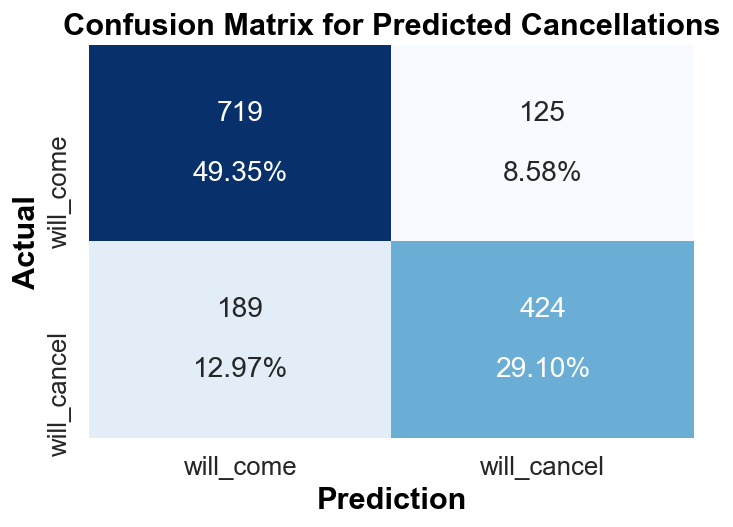

Optimal probability threshold (to maximize F-0.5): 0.62
F-0.5 Score: 0.755

Setting up simulation...
Estimating prices...
Pulling T-Minus OTB statistics...
Pulling STLY OTB statistics...
Training 25 models to obtain STLY statistics...

Pulling stats from STLY date 2016-08-08, stay_date 2016-08-08...
Pulling stats from STLY date 2016-08-08, stay_date 2016-08-09...
Pulling stats from STLY date 2016-08-08, stay_date 2016-08-10...
Pulling stats from STLY date 2016-08-08, stay_date 2016-08-11...
Pulling stats from STLY date 2016-08-08, stay_date 2016-08-12...
Pulling stats from STLY date 2016-08-08, stay_date 2016-08-13...
Pulling stats from STLY date 2016-08-08, stay_date 2016-08-14...
Pulling stats from STLY date 2016-08-08, stay_date 2016-08-15...
Pulling stats from STLY date 2016-08-08, stay_date 2016-08-16...
Pulling stats from STLY date 2016-08-08, stay_date 2016-08-17...
Pulling stats from STLY date 2016-08-08, stay_date 2016-08-18...
Pulling stats from STLY date 2016-08-08, stay_dat

In [14]:
h1_stly_sim = generate_simulation(h1_dbd, '2017-08-07', 1, h1_res)


In [15]:
[col for col in h1_sim.columns]

['DOW',
 'RoomsOTB',
 'RevOTB',
 'CxlForecast',
 'TRN_RoomsOTB',
 'TRN_RevOTB',
 'TRN_CxlForecast',
 'TRNP_RoomsOTB',
 'TRNP_RevOTB',
 'TRNP_CxlForecast',
 'GRP_RoomsOTB',
 'GRP_RevOTB',
 'GRP_CxlForecast',
 'CNT_RoomsOTB',
 'CNT_RevOTB',
 'CNT_CxlForecast',
 'Date',
 'TM05_Date',
 'TM15_Date',
 'TM30_Date',
 'WeekEndDate',
 'WE',
 'WD',
 'STLY_Date',
 'Occ',
 'RevPAR',
 'RemSupply',
 'ADR_OTB',
 'TRN_ADR_OTB',
 'TRNP_ADR_OTB',
 'GRP_ADR_OTB',
 'CNT_ADR_OTB',
 'LYA_Occ',
 'LYA_RoomsSold',
 'LYA_ADR',
 'LYA_RoomRev',
 'LYA_RevPAR',
 'LYA_NumCancels',
 'LYA_TRN_RoomsSold',
 'LYA_TRN_ADR',
 'LYA_TRN_RoomRev',
 'LYA_GRP_RoomsSold',
 'LYA_GRP_ADR',
 'LYA_GRP_RoomRev',
 'LYA_TRNP_RoomsSold',
 'LYA_TRNP_ADR',
 'LYA_TRNP_RoomRev',
 'LYA_CNT_RoomsSold',
 'LYA_CNT_ADR',
 'LYA_CNT_RoomRev',
 'RoomsGapToLYA',
 'ADR_GapToLYA',
 'Actual_RoomsSold',
 'Actual_ADR',
 'Actual_RoomRev',
 'Actual_TRN_RoomsSold',
 'Actual_TRN_ADR',
 'Actual_TRN_RoomRev',
 'Realized_Cxls',
 'SellingPrice',
 'TM30_RoomsOTB',

In [16]:
ty_otb_cols = [
     'RoomsOTB',
     'ADR_OTB',
     'RevOTB',
     'TRN_RoomsOTB',
     'TRN_ADR_OTB'
     'TRN_RevOTB',

]

final_stly_otb_cols = ['STLY_' + col for col in ty_otb_cols]

def merge(list1, list2): 
      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

merge(ty_otb_cols, final_stly_otb_cols)



[('RoomsOTB', 'STLY_RoomsOTB'),
 ('ADR_OTB', 'STLY_ADR_OTB'),
 ('RevOTB', 'STLY_RevOTB'),
 ('TRN_RoomsOTB', 'STLY_TRN_RoomsOTB'),
 ('TRN_ADR_OTBTRN_RevOTB', 'STLY_TRN_ADR_OTBTRN_RevOTB')]

In [17]:
ty_pace_cols = [
     'RoomsOTB',
     'ADR_OTB',
     'RevOTB',
     'TRN_RoomsOTB',
     'TRN_ADR_OTB'
     'TRN_RevOTB',
     'TM30_RoomsPickup',
     'TM30_ADR_Pickup',
     'TM30_RevPickup',
     'TM15_RoomsPickup',
     'TM15_ADR_Pickup',
     'TM15_RevPickup',
     'TM05_RoomsPickup',
     'TM05_ADR_Pickup',
     'TM05_RevPickup',
     'TM30_TRN_RoomsPickup',
     'TM30_TRN_ADR_Pickup',
     'TM30_TRN_RevPickup',
     'TM15_TRN_RoomsPickup',
     'TM15_TRN_ADR_Pickup',
     'TM15_TRN_RevPickup',
     'TM05_TRN_RoomsPickup',
     'TM05_TRN_ADR_Pickup',
     'TM05_TRN_RevPickup',
]

stly_pace_cols = ['STLY_' + col for col in ty_pace_cols]

pace_tuples = merge(ty_pace_cols, stly_pace_cols)

In [18]:
[col for col in h1_sim.columns]

['DOW',
 'RoomsOTB',
 'RevOTB',
 'CxlForecast',
 'TRN_RoomsOTB',
 'TRN_RevOTB',
 'TRN_CxlForecast',
 'TRNP_RoomsOTB',
 'TRNP_RevOTB',
 'TRNP_CxlForecast',
 'GRP_RoomsOTB',
 'GRP_RevOTB',
 'GRP_CxlForecast',
 'CNT_RoomsOTB',
 'CNT_RevOTB',
 'CNT_CxlForecast',
 'Date',
 'TM05_Date',
 'TM15_Date',
 'TM30_Date',
 'WeekEndDate',
 'WE',
 'WD',
 'STLY_Date',
 'Occ',
 'RevPAR',
 'RemSupply',
 'ADR_OTB',
 'TRN_ADR_OTB',
 'TRNP_ADR_OTB',
 'GRP_ADR_OTB',
 'CNT_ADR_OTB',
 'LYA_Occ',
 'LYA_RoomsSold',
 'LYA_ADR',
 'LYA_RoomRev',
 'LYA_RevPAR',
 'LYA_NumCancels',
 'LYA_TRN_RoomsSold',
 'LYA_TRN_ADR',
 'LYA_TRN_RoomRev',
 'LYA_GRP_RoomsSold',
 'LYA_GRP_ADR',
 'LYA_GRP_RoomRev',
 'LYA_TRNP_RoomsSold',
 'LYA_TRNP_ADR',
 'LYA_TRNP_RoomRev',
 'LYA_CNT_RoomsSold',
 'LYA_CNT_ADR',
 'LYA_CNT_RoomRev',
 'RoomsGapToLYA',
 'ADR_GapToLYA',
 'Actual_RoomsSold',
 'Actual_ADR',
 'Actual_RoomRev',
 'Actual_TRN_RoomsSold',
 'Actual_TRN_ADR',
 'Actual_TRN_RoomRev',
 'Realized_Cxls',
 'SellingPrice',
 'TM30_RoomsOTB',

In [19]:
h1_sim[['TM30_ADR_Pickup', 'STLY_TM30_ADR_Pickup', 'TM30_ADR_Pickup_Pace']]

,TM30_ADR_Pickup,STLY_TM30_ADR_Pickup,TM30_ADR_Pickup_Pace
2017-08-01,3.34,4.00,-0.66
2017-08-02,6.45,3.47,2.98
2017-08-03,4.93,5.10,-0.17
2017-08-04,1.70,7.07,-5.37
2017-08-05,3.77,6.84,-3.07
2017-08-06,6.18,5.43,0.75
2017-08-07,1.18,5.18,-4.00
2017-08-08,-0.89,3.93,-4.82
2017-08-09,-1.77,5.51,-7.28
2017-08-10,-4.60,8.29,-12.89
